In [1]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
import hist
matplotlib.rcParams["figure.dpi"] = 300

In [2]:
input = "/work/tharte/datasets/samples_no_model_input_for_spanet/no_model_sf_btag_comparison/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"

o = load(f"{input}")

In [16]:
print(o.keys())
print(o["datasets_metadata"]["by_dataset"]['GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE'].keys())
print(o["variables"].keys())

dict_keys(['sum_genweights', 'sum_signOf_genweights', 'sumw', 'sumw2', 'cutflow', 'variables', 'columns', 'processing_metadata', 'datasets_metadata'])
dict_keys(['das_names', 'sample', 'year', 'isMC', 'xsec', 'part', 'nevents', 'size', 'skim_efficiency', 'skim_rescale_genweights', 'isSkim'])
dict_keys(['jet_eta_1', 'jet_pt_1', 'jet_phi_1', 'jet_eta_2', 'jet_pt_2', 'jet_phi_2', 'jet_eta_3', 'jet_pt_3', 'jet_phi_3', 'jet_eta_4', 'jet_pt_4', 'jet_phi_4', 'jet_eta_5', 'jet_pt_5', 'jet_phi_5', 'PuppiMET_pt', 'PuppiMET_phi'])


In [17]:
hist1 = o["variables"]["PuppiMET_pt"]["GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_skimmed"]["GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE"]
hist2 = o["variables"]["PuppiMET_pt"]["GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_skimmed"]["GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE"]
print(hist1+hist2)
print(hist1)
histlist = [hist1, hist2]
print(sum(histlist))

Hist(
  StrCategory(['inclusive', 'inclusive_sf_btag'], name='cat', label='Category'),
  StrCategory(['AK4PFPuppi_JERDown', 'AK4PFPuppi_JERUp', 'AK4PFPuppi_JES_TotalDown', 'AK4PFPuppi_JES_TotalUp', 'nominal', 'pileupDown', 'pileupUp', 'sf_btag_fixed_multiple_wp_bfragmentationDown', 'sf_btag_fixed_multiple_wp_bfragmentationUp', 'sf_btag_fixed_multiple_wp_colorreconnectionDown', 'sf_btag_fixed_multiple_wp_colorreconnectionUp', 'sf_btag_fixed_multiple_wp_hdampDown', 'sf_btag_fixed_multiple_wp_hdampUp', 'sf_btag_fixed_multiple_wp_jerDown', 'sf_btag_fixed_multiple_wp_jerUp', 'sf_btag_fixed_multiple_wp_jesDown', 'sf_btag_fixed_multiple_wp_jesUp', 'sf_btag_fixed_multiple_wp_pdfDown', 'sf_btag_fixed_multiple_wp_pdfUp', 'sf_btag_fixed_multiple_wp_pileupDown', 'sf_btag_fixed_multiple_wp_pileupUp', 'sf_btag_fixed_multiple_wp_statisticDown', 'sf_btag_fixed_multiple_wp_statisticUp', 'sf_btag_fixed_multiple_wp_type3Down', 'sf_btag_fixed_multiple_wp_type3Up'], name='variation', label='Variation'),
  

In [33]:
def get_var(var_name):
    sum_nom=o["variables"][var_name]["GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_skimmed"]["GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE"][{"cat":'inclusive', "variation":'nominal'}].sum(flow=True).value
    sum_sf=o["variables"][var_name]["GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_skimmed"]["GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE"][{"cat":'inclusive_sf_btag', "variation":'nominal'}].sum(flow=True).value
    return sum_nom, sum_sf

In [34]:
for var_name in o["variables"].keys():
    sum_nom, sum_sf = get_var(var_name)
    diff = (sum_sf/sum_nom-1)*100
    print(f"{var_name}: nominal = {sum_nom:.4f}, sf_btag = {sum_sf:.4f}, diff = {diff:.4f} %")

jet_eta_1: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_pt_1: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_phi_1: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_eta_2: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_pt_2: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_phi_2: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_eta_3: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_pt_3: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_phi_3: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_eta_4: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_pt_4: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_phi_4: nominal = 95.0709, sf_btag = 95.3084, diff = 0.2497 %
jet_eta_5: nominal = 61.9114, sf_btag = 62.0696, diff = 0.2557 %
jet_pt_5: nominal = 61.9114, sf_btag = 62.0696, diff = 0.2557 %
jet_phi_5: nominal = 61.9114, sf_btag = 62.0696, diff = 0.2557 %
PuppiMET_pt: nominal = 95.0709

In [43]:
# load a coffea file
import argparse
import logging

import matplotlib
from coffea.util import load
from utils.plot.HEPPlotter import HEPPlotter

matplotlib.rcParams["figure.dpi"] = 300

logging.basicConfig(format='%(asctime)s,%(msecs)03d %(name)s %(levelname)s %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO)
logger = logging.getLogger()



def get_var(coffea_file, sample, datasets, variable, variation="nominal"):
    """Get variable for a sample, summing over all datasets of that sample."""
    hist_nominal = []
    hist_sf_btag = []
    for dset in datasets:
        hist_nominal.append(coffea_file["variables"][variable][sample][dset][{"cat": "inclusive", "variation": variation}])
        hist_sf_btag.append(coffea_file["variables"][variable][sample][dset][{"cat": "inclusive_sf_btag", "variation": variation}])
    return sum(hist_nominal), sum(hist_sf_btag)

def compare_histograms(coffea_file, sample_datasets):
    """Compare the sum over nominal vs. SF histograms as simple check.

    After comparison, call script to compare bin-by-bin and produce plots.
    """
    hist_collection = {}
    for sample, datasets in sample_datasets.items():
        hist_collection[sample] = {}
        logger.info(f"Comparing histogram sums for sample: {sample}")
        logger.info("variable \t nominal sum \t btag_sf sum \t ratio")
        for variable in coffea_file["variables"].keys():
            hist_nom, hist_sf = get_var(coffea_file, sample, datasets, variable)
            hist_collection[sample][variable] = [hist_nom, hist_sf]
            nom_sum = hist_nom.sum(flow=True).value
            sf_sum = hist_sf.sum(flow=True).value
            diff = (sf_sum / nom_sum - 1) * 100
            logger.info(f"{variable} \t {nom_sum:.4f} \t {sf_sum:.4f} \t {diff:.4f} %")
    return hist_collection

# Just for testing for the moment:
input_file = "/work/tharte/datasets/samples_no_model_input_for_spanet/no_model_sf_btag_comparison/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"

coffea_file = load(input_file)

datasets = coffea_file["datasets_metadata"]["by_dataset"].keys()
sample_datasets = {}
for dset in datasets:
    sample = coffea_file["datasets_metadata"]["by_dataset"][dset]["sample"]
    if sample in sample_datasets.keys():
        sample_datasets[sample].append(dset)
    else:
        sample_datasets[sample] = [dset]

hist_collection = compare_histograms(coffea_file, sample_datasets)


2025-11-11 14:01:46,492 root INFO Comparing histogram sums for sample: GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_skimmed
2025-11-11 14:01:46,494 root INFO variable 	 nominal sum 	 btag_sf sum 	 ratio
2025-11-11 14:01:46,495 root INFO jet_eta_1 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,496 root INFO jet_pt_1 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,496 root INFO jet_phi_1 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,497 root INFO jet_eta_2 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,498 root INFO jet_pt_2 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,499 root INFO jet_phi_2 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,500 root INFO jet_eta_3 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,500 root INFO jet_pt_3 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,501 root INFO jet_phi_3 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,502 root INFO jet_eta_4 	 95.0709 	 95.3084 	 0.2497 %
2025-11-11 14:01:46,503 root INFO jet_pt_4 	 95.0

2025-11-11 14:09:03,207 root INFO Comparing histograms bin-by-bin
2025-11-11 14:09:03,207 root INFO Comparing variable jet_eta_1


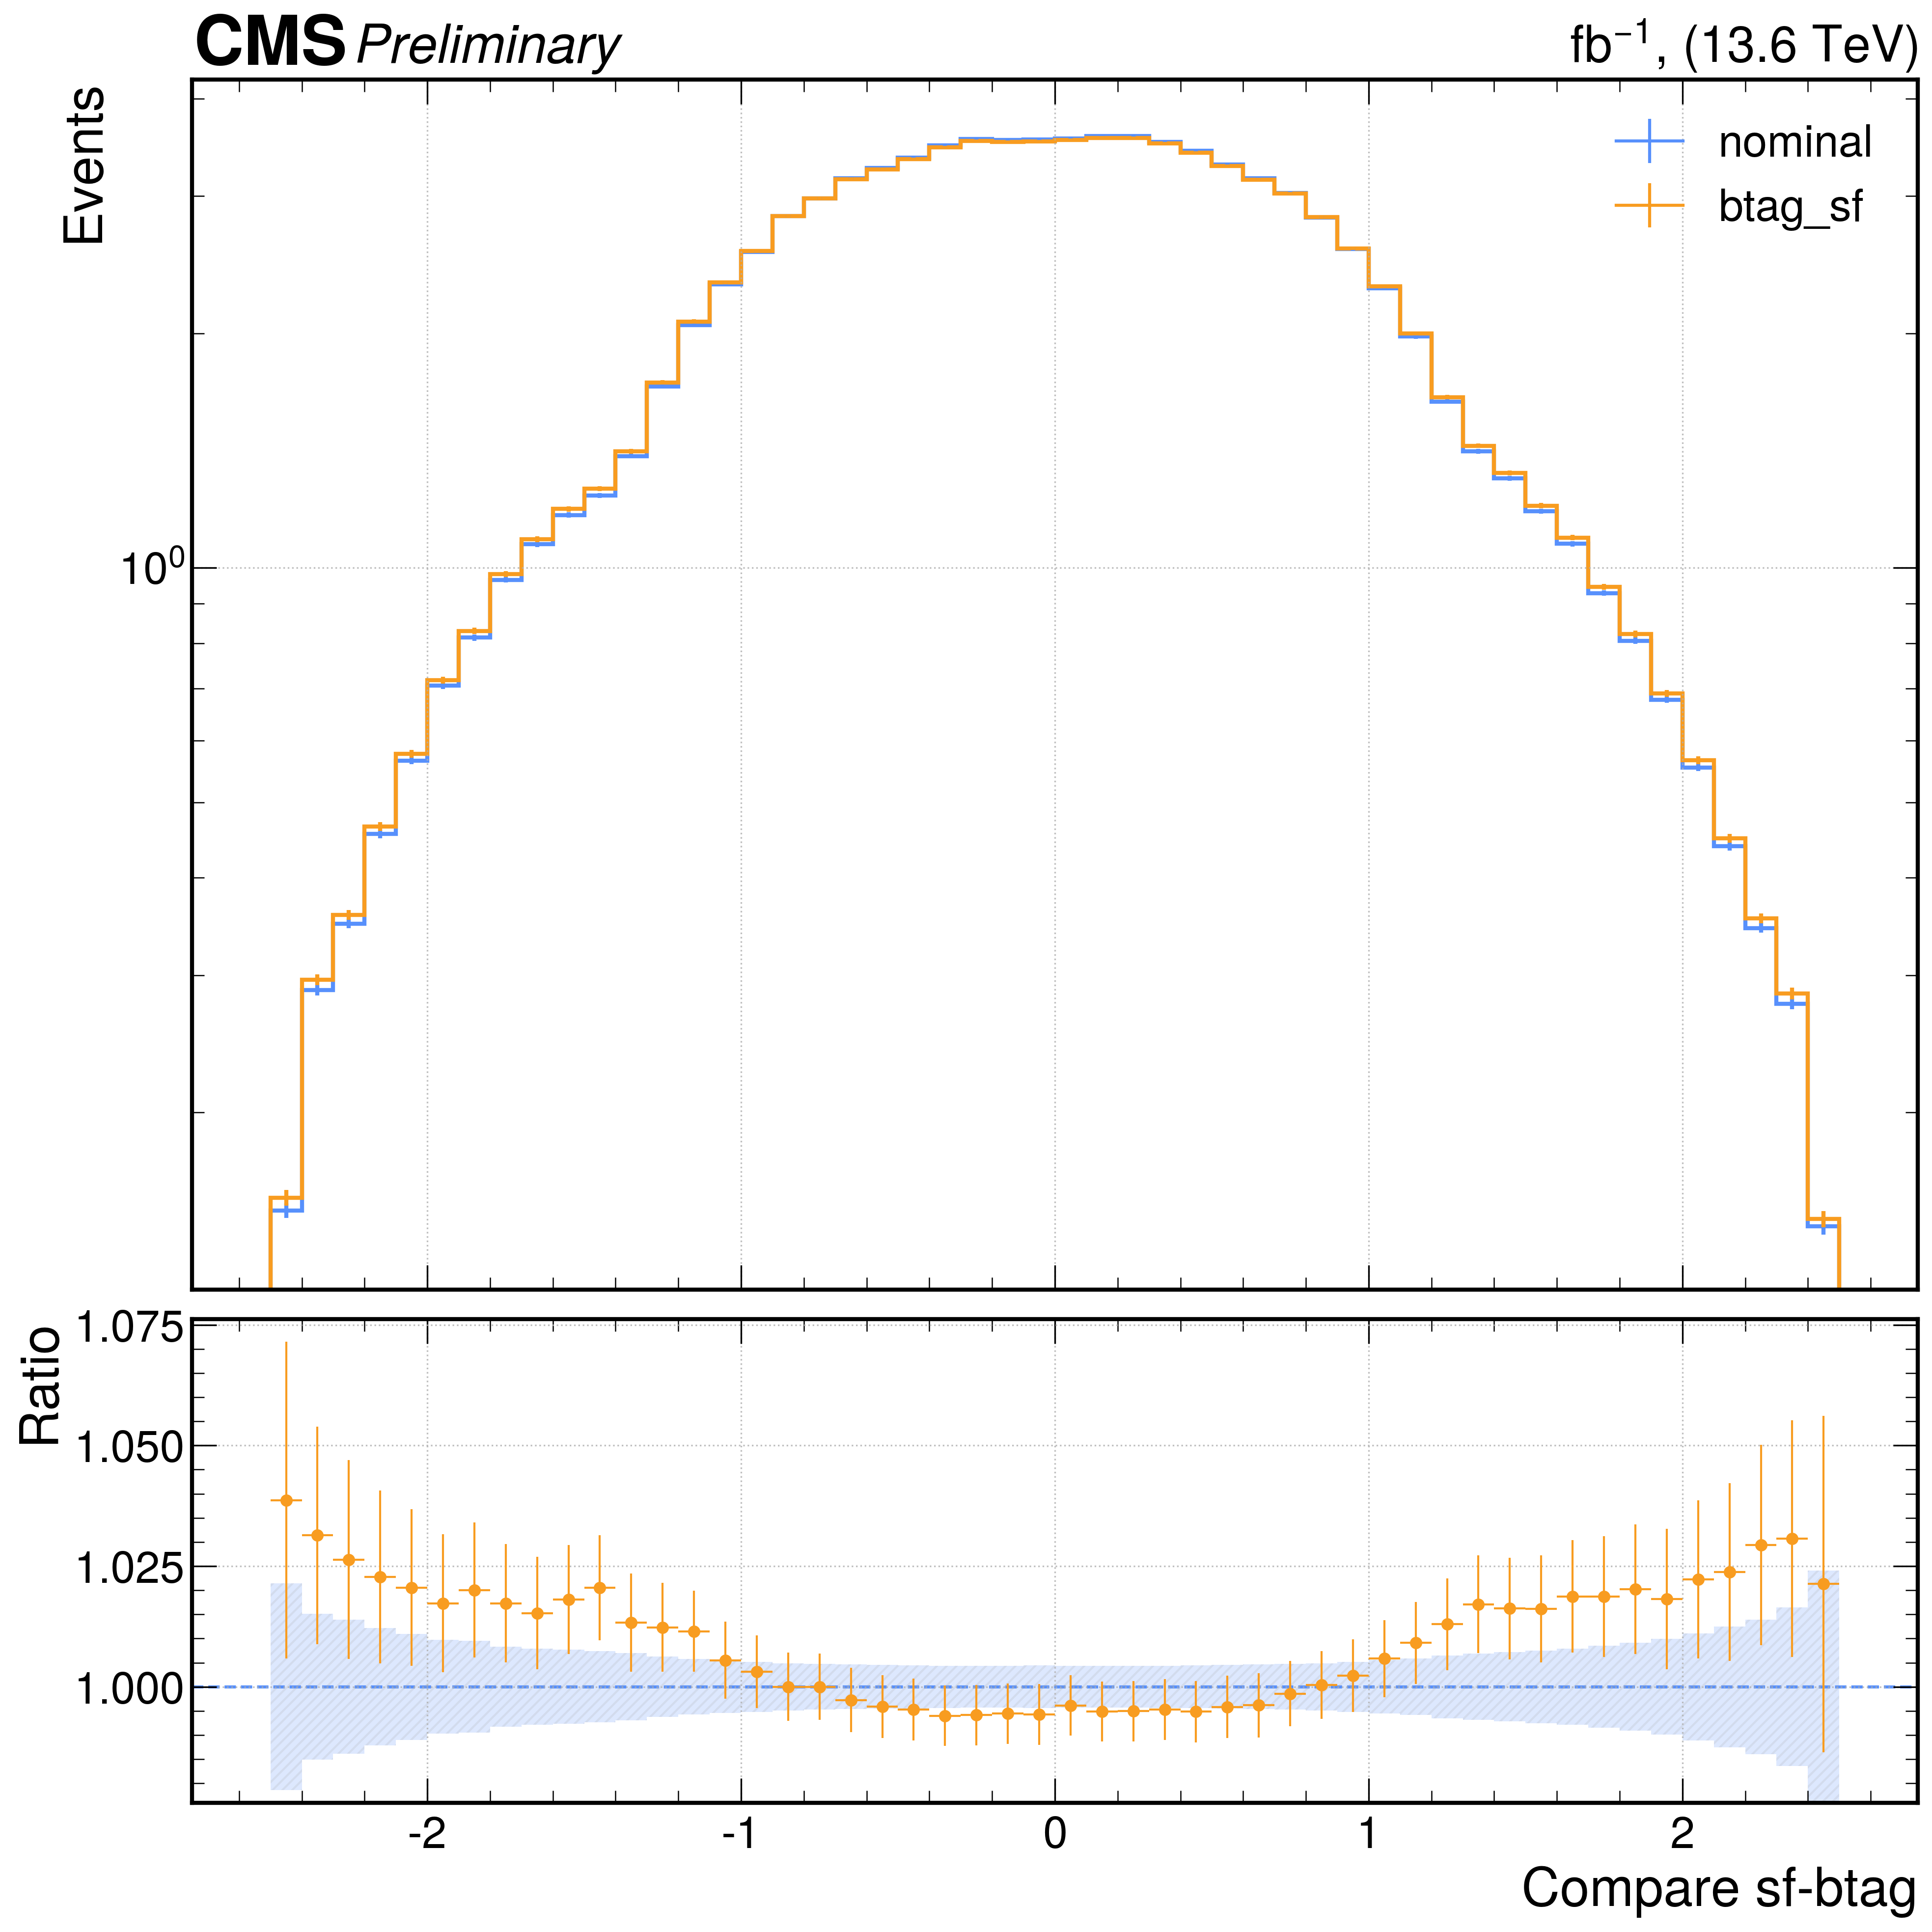

In [56]:
output_base = "/work/tharte/datasets/"

def compare_bin_by_bin(hist_collection):
    """Compare the nominal vs. SF histograms bin-by-bin."""
    logger.info("Comparing histograms bin-by-bin")
    for sample, variables in hist_collection.items():
        for variable, hist_nom_sf in variables.items():
            logger.info(f"Comparing variable {variable}")
            hist_dict = {"nominal": {"data": hist_nom_sf[0], "style": {"is_reference": True}}, "btag_sf": {"data": hist_nom_sf[1]}}
            (
                HEPPlotter()
                .set_plot_config(
                    lumitext=f"" + r" $fb^{-1}$, (13.6 TeV)",
                    figsize=[13, 13],
                )
                .set_output(output_base)
                .set_labels(
                    "Compare sf-btag",
                    "Events",
                )
                .set_options(y_log=True, x_log=False, set_ylim=False, legend=True)
                .set_data(hist_dict, plot_type="1d").show().run()
            )
            break

compare_bin_by_bin(hist_collection)
